# Take home challange problem
## part 1

In [64]:
import json
import pandas as pd
with open("takehome\logins.json", "r") as read_it: 
     data = json.load(read_it) 
df=pd.DataFrame(data)
df['just_count']=1
df.head(10)

,login_time,just_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
5,1970-01-01 20:21:41,1
6,1970-01-01 20:12:16,1
7,1970-01-01 20:35:47,1
8,1970-01-01 20:35:38,1
9,1970-01-01 20:47:52,1


In [65]:
df['datetime'] = pd.to_datetime(df['login_time'])
df = df.set_index('datetime')
df.drop(['login_time'], axis=1, inplace=True)
df.head()


,just_count
datetime,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [66]:
# login count every 15 minutes
df=df.resample('15T').sum()
df['newdate']=df.index
df.head(10)

,just_count,newdate
datetime,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00
1970-01-01 21:15:00,4,1970-01-01 21:15:00
1970-01-01 21:30:00,0,1970-01-01 21:30:00
1970-01-01 21:45:00,4,1970-01-01 21:45:00
1970-01-01 22:00:00,9,1970-01-01 22:00:00


In [67]:
len(df.index)




9788

In [68]:
df_15=df['just_count']

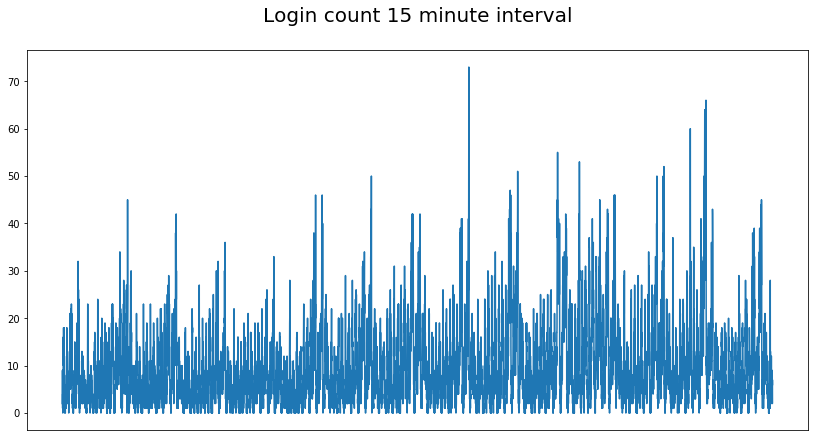

In [78]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(14,7))
plt.title('Login count 15 minute interval\n', size=20)
plt.xticks([])
plt.plot(df_15.index,df_15)

## There seems to exist a pattern - higher waves may be for weekends

In [70]:
df.groupby(df["newdate"].dt.minute).count()

,just_count,newdate
newdate,,
0,2447,2447
15,2447,2447
30,2447,2447
45,2447,2447


In [71]:
df['day']=df['newdate'].dt.day_name()
df.head()

,just_count,newdate,day
datetime,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,Thursday
1970-01-01 20:15:00,6,1970-01-01 20:15:00,Thursday
1970-01-01 20:30:00,9,1970-01-01 20:30:00,Thursday
1970-01-01 20:45:00,7,1970-01-01 20:45:00,Thursday
1970-01-01 21:00:00,1,1970-01-01 21:00:00,Thursday


In [72]:
hold=df.groupby('day')['just_count'].count()
hold

day
Friday       1440
Monday       1420
Saturday     1440
Sunday       1440
Thursday     1360
Tuesday      1344
Wednesday    1344
Name: just_count, dtype: int64

<BarContainer object of 7 artists>

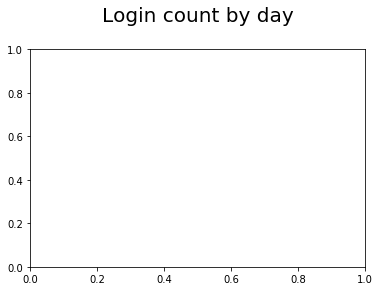

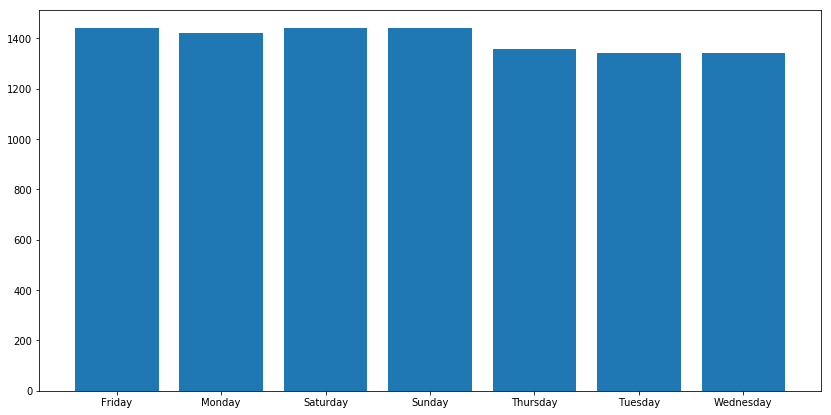

In [73]:
x1=hold.keys()
x1
plt.title("Login count by day\n", size=20)
fig=plt.figure(figsize=(14,7))

plt.bar(x1,hold)

## higer login counts on Friday, Saturday and Sunday

In [74]:
# resample by hour
df_h=df.resample('H').sum()
df_h['newdate']=df_h.index


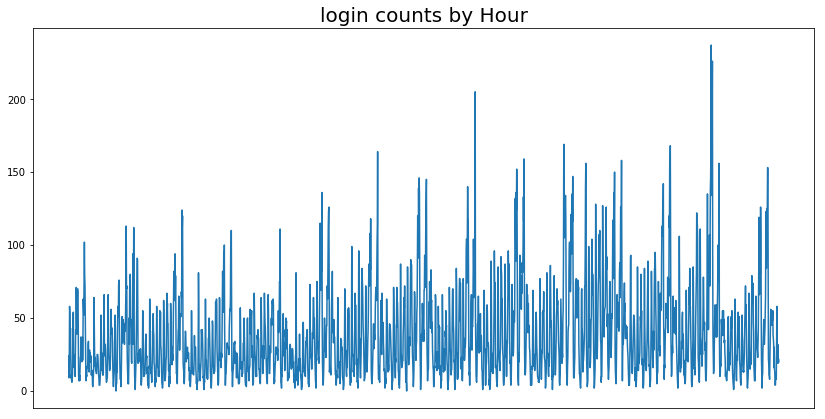

In [79]:

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(14,7))
plt.title('login counts by Hour',size=20)
plt.xticks([])
plt.plot(df_h['just_count'])

## There exists a daily hoursly cycle and higher wave is probaboly for Friday, Saturday and Sunday

# Part 2 – Experiment and matrix design

The key measure of success is to increase availability of driver partners on both cities to minimize waiting time to hire. That means the eventual goal of the city mayors to offer better services to their citizens and to increase the social and economic interaction between both cities so that both cities prosper.  

The experiment will be divided into two periods of time – a control period and an experimental period. The time interval within each period must be reasonable to avoid other variables’ impacts such as seasonal cycles, weekly cycles, and many more related factors.  


The variables will be collected are time-hour, days, city of origin, city of destination, weekdays or weekends, holidays or not.


We can conduct a t-test of mean to see the significance of the experiment. Each hour will represent a data point. Our hypothesis is there no impact on increasing riders by reimbursing the toll money against an impact with reimbursing the toll money.  We can also run the same kind of statistical tests for other variables such as weekly, point of origin, and may be more in this line.  


We will communicate the results as how likely would be the impact of the implementing the reimbursement of the toll money along with other data exploration information to tell different stories in the context of the experiment.

- 


# Part 3

In [13]:
import json
import matplotlib.pyplot as plt
import pandas as pd
with open(r"takehome\ultimate_data_challenge.json", "r") as read_it: 
     data = json.load(read_it) 
df2=pd.DataFrame(data)
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [14]:
df2.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct'],
      dtype='object')

In [15]:
df2.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
df2.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [18]:
print(df2[df2["avg_rating_by_driver"].isnull()])

       avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
90         6.28                   NaN                   5.0       1.00   
274        6.00                   NaN                   2.0       4.00   
277        1.82                   NaN                   NaN       1.00   
536        1.41                   NaN                   5.0       1.00   
857        0.42                   NaN                   4.0       1.00   
1021       2.33                   NaN                   NaN       1.75   
1073       9.21                   NaN                   5.0       1.00   
1164       2.57                   NaN                   2.0       1.00   
1181      24.91                   NaN                   3.0       1.00   
1205       8.94                   NaN                   NaN       1.00   
1364       3.60                   NaN                   3.0       1.00   
1420      14.77                   NaN                   NaN       1.00   
1679       1.99                   NaN 

In [19]:
# fill in all avg_rating_by_driver with mean value
import numpy as np
df2.fillna(df2.mean(), inplace=True)
# count the number of NaN values in each column
print(df2.isnull().sum())

avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
dtype: int64


## missing values have been replaced with mean values

In [20]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [21]:
df2['status']=df2['ultimate_black_user'].apply(lambda x: 'active' if x==True else 'inactive')
df2

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,status
0,3.67,5.0,4.700000,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,active
1,8.26,5.0,5.000000,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,inactive
2,0.77,5.0,4.300000,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,inactive
3,2.36,4.9,4.600000,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,active
4,3.13,4.9,4.400000,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,inactive
5,10.56,5.0,3.500000,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,active
6,3.95,4.0,4.601559,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,inactive
7,2.04,5.0,5.000000,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,inactive
8,4.36,5.0,4.500000,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,inactive
9,2.37,5.0,4.601559,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,inactive


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
status                    50000 non-null object
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 4.6+ MB


In [23]:
# checking for outliers
df_outlier=df2.copy()
del df_outlier['city']
del df_outlier['last_trip_date']
del df_outlier['signup_date']
del df_outlier['ultimate_black_user']
del df_outlier['status']
del df_outlier['phone']

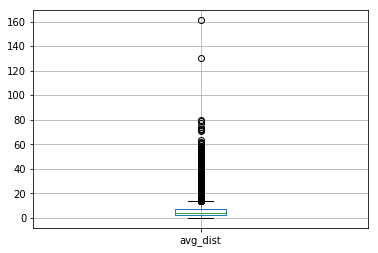

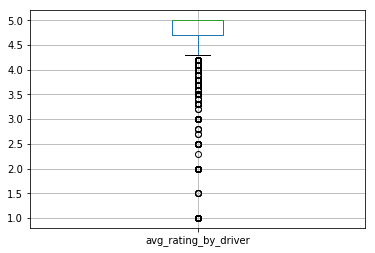

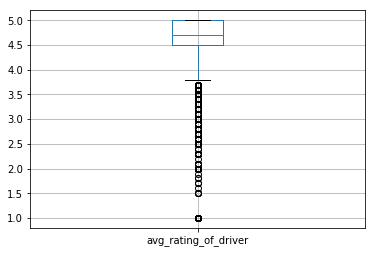

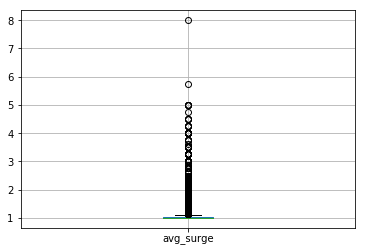

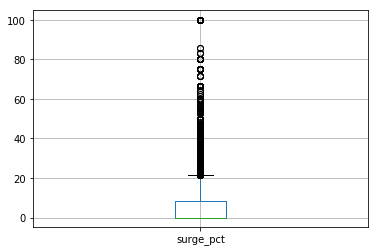

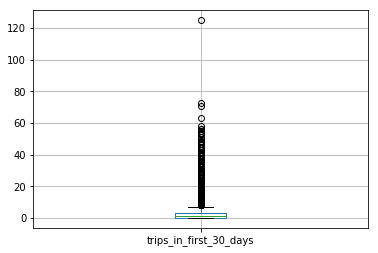

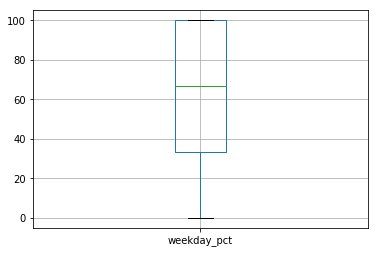

In [24]:

for column in df_outlier:
    plt.figure()
    df_outlier.boxplot([column])

# no outliers

# Begin now data exploration

In [25]:
# count by status
df2.groupby('status')['status'].count()

status
active      18854
inactive    31146
Name: status, dtype: int64

In [26]:
df2.groupby('city')['city','status'].count()

,city,status
city,,
Astapor,16534,16534
King's Landing,10130,10130
Winterfell,23336,23336


In [27]:
# look at phone user
df2.columns
df2.groupby(['phone','status'])['status'].count()

phone    status  
Android  active       4822
         inactive    10200
iPhone   active      13790
         inactive    20792
Name: status, dtype: int64

In [28]:
# find out active in each city
df2['still_active']=df2['ultimate_black_user'].apply(lambda x: 1 if x==True else 0)
df2.tail(15)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,status,still_active
49985,1.38,5.0,4.601559,1.00,Astapor,2014-02-25,Android,2014-01-26,0.0,1,False,100.0,inactive,0
49986,0.52,5.0,4.000000,1.00,Winterfell,2014-05-23,Android,2014-01-21,0.0,0,False,100.0,inactive,0
49987,4.24,4.0,4.600000,1.00,Winterfell,2014-05-31,iPhone,2014-01-27,0.0,3,False,80.0,inactive,0
49988,2.53,5.0,4.500000,1.00,King's Landing,2014-06-14,iPhone,2014-01-20,0.0,1,False,50.0,inactive,0
49989,0.00,5.0,4.601559,1.00,Winterfell,2014-01-31,iPhone,2014-01-24,0.0,1,False,100.0,inactive,0
49990,3.38,5.0,4.700000,1.08,Astapor,2014-05-18,iPhone,2014-01-13,33.3,1,True,33.3,active,1
49991,1.06,5.0,5.000000,1.25,Winterfell,2014-06-29,iPhone,2014-01-08,100.0,0,False,0.0,inactive,0
49992,7.58,5.0,1.000000,1.00,King's Landing,2014-01-19,iPhone,2014-01-18,0.0,1,False,0.0,inactive,0
49993,2.53,4.7,4.800000,1.11,Astapor,2014-07-01,iPhone,2014-01-03,11.1,3,True,55.6,active,1
49994,2.25,4.5,4.600000,1.44,Astapor,2014-05-31,iPhone,2014-01-03,37.5,1,False,25.0,inactive,0


In [29]:
df2.groupby(['city','status'])['still_active'].count()

city            status  
Astapor         active       6477
                inactive    10057
King's Landing  active       4206
                inactive     5924
Winterfell      active       8171
                inactive    15165
Name: still_active, dtype: int64

In [30]:
total=[16534,10130,23336]
active=[6477,4206,8171]
inactive=[10057,5924,15165]

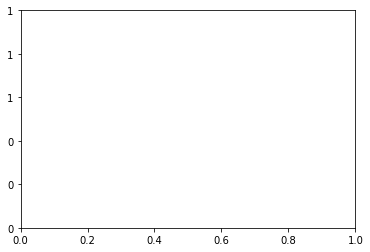

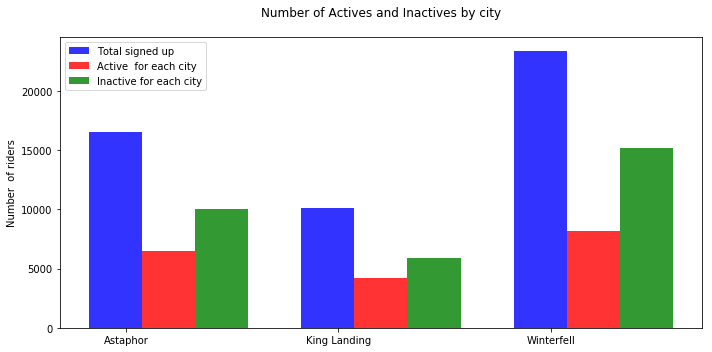

In [31]:
# create plot
import matplotlib as mpl
import numpy as np
index = np.arange(3)
fig, ax = plt.subplots()
plt.figure(figsize=(10,5))
#index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

fake=['A','B','C']
first = plt.bar(fake, total, bar_width,
alpha=opacity,
color='b',
label='Total signed up')

second = plt.bar(index + bar_width, active, bar_width, alpha=opacity,color='r',label='Active  for each city')
third = plt.bar(index + bar_width+bar_width, inactive, bar_width, alpha=opacity,color='g',label='Inactive for each city')
#plt.xlabel('\nBlue indicates total population for each group and \nred indicates the number of individuals holding stocks from that group\n')
plt.ylabel('Number  of riders')
plt.title('Number of Actives and Inactives by city\n')
plt.xticks(index + bar_width-.2, ('Astaphor','King Landing', 'Winterfell'))
plt.legend()
plt.tight_layout()

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [32]:
# people who never took a trip in first 30 days and still inactive


In [33]:
# people who did not take a trip in first 30 days but still active

In [34]:
# look at the distribution of the signup date

In [35]:
# number of trips in the first 30 days and still active
df_date=df2.copy()
df_date.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,status,still_active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,active,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,inactive,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,inactive,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,active,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,inactive,0


In [36]:
# do both signedup distribution and retention percentage or fraction
df_group=df_date.groupby('signup_date')['ultimate_black_user'].count()
df_group

signup_date
2014-01-01    1737
2014-01-02    1004
2014-01-03    1213
2014-01-04    1485
2014-01-05    1343
2014-01-06    1763
2014-01-07    1486
2014-01-08    1275
2014-01-09    1433
2014-01-10    2021
2014-01-11    2402
2014-01-12    1334
2014-01-13    1049
2014-01-14    1120
2014-01-15    1110
2014-01-16    1431
2014-01-17    2149
2014-01-18    2948
2014-01-19    2028
2014-01-20    1295
2014-01-21    1234
2014-01-22    1369
2014-01-23    1606
2014-01-24    2284
2014-01-25    2885
2014-01-26    1708
2014-01-27    1236
2014-01-28    1284
2014-01-29    1197
2014-01-30    1471
2014-01-31    2100
Name: ultimate_black_user, dtype: int64

In [92]:
vv=list(df_group.values)
kk=list(df_group.keys())
kk

['2014-01-01',
 '2014-01-02',
 '2014-01-03',
 '2014-01-04',
 '2014-01-05',
 '2014-01-06',
 '2014-01-07',
 '2014-01-08',
 '2014-01-09',
 '2014-01-10',
 '2014-01-11',
 '2014-01-12',
 '2014-01-13',
 '2014-01-14',
 '2014-01-15',
 '2014-01-16',
 '2014-01-17',
 '2014-01-18',
 '2014-01-19',
 '2014-01-20',
 '2014-01-21',
 '2014-01-22',
 '2014-01-23',
 '2014-01-24',
 '2014-01-25',
 '2014-01-26',
 '2014-01-27',
 '2014-01-28',
 '2014-01-29',
 '2014-01-30',
 '2014-01-31']

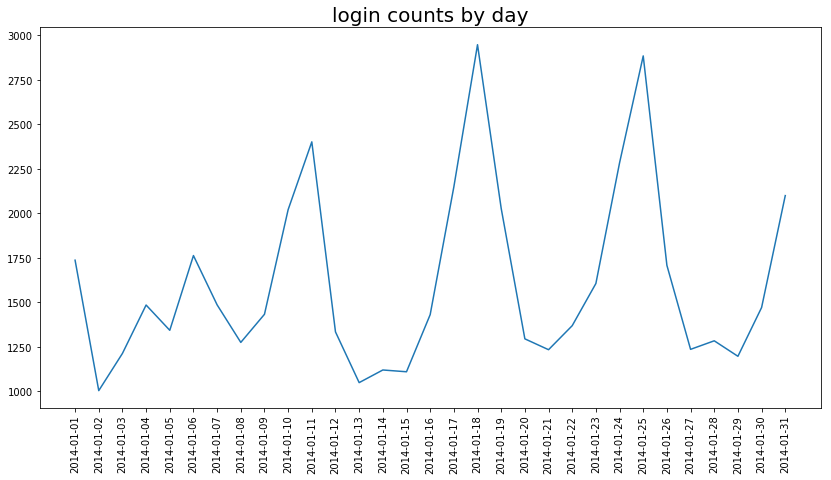

In [97]:
fig=plt.figure(figsize=(14,7))
plt.title('login counts by dates',size=20)
#plt.xticks([])
plt.xticks(rotation=90)
plt.plot(kk,vv)

In [38]:
x=df_group.index
y=df_group.values

In [100]:
# get the day and plot it
temp=[day_name,y ]
df3=pd.DataFrame(temp).T
xx=df3.groupby(0)[1].sum()

In [42]:
xx

0
Friday       9767
Monday       5343
Saturday     9720
Sunday       6413
Thursday     6945
Tuesday      5124
Wednesday    6688
Name: 1, dtype: int64

In [112]:
x=xx.index
y=[9767,5343,9720,6413,6945,5124,6688]


<BarContainer object of 7 artists>

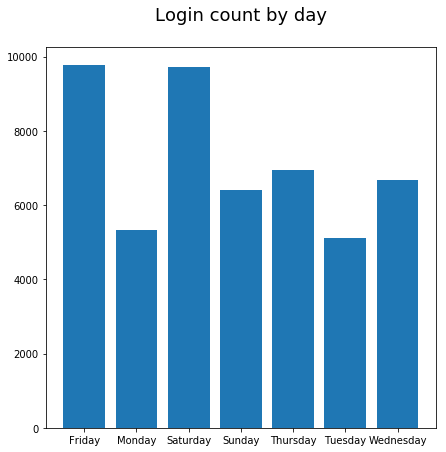

In [116]:
fig=plt.figure(figsize=(7,7))
plt.title('Login count by day\n', size=18)

plt.bar(x,y)

# Prepare the data for the model building

In [45]:
# take all columns that are not necessary such dates, phone number, and other I used during data exploration
df2.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'status', 'still_active'],
      dtype='object')

In [46]:
df2.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'status', 'still_active'],
      dtype='object')

In [47]:
del df2['last_trip_date']
del df2['signup_date']
del df2['ultimate_black_user']
del df2['still_active']


In [48]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,weekday_pct,status
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,46.2,active
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,50.0,inactive
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,100.0,inactive
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,80.0,active
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,82.4,inactive


In [49]:
# change active as 1 and inactive 0 for modeling
df2['target']=df2['status'].apply(lambda x: 1 if x=='active' else 0)
del df2['status']
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,weekday_pct,target
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,82.4,0


In [50]:
# split predictors and target variable
X=df2.drop(['target'], axis=1)
y=df2['target']
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,46.2
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,50.0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,100.0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,80.0
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,82.4


In [51]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [52]:
X=pd.get_dummies(X)
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0


In [53]:
# let;s split the data into training and test set
# Now split the data for machine learning
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
print ('X_train ',X_train.shape)
print ('X_test ',X_test.shape)
print ('y_train ',y_train.shape)
print ('y_test ',y_test.shape)

X_train  (33500, 12)
X_test  (16500, 12)
y_train  (33500,)
y_test  (16500,)


# logistic regression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf_lr = LogisticRegression(solver='lbfgs',max_iter=9000)
# Fit the model on the trainng data.
clf_lr.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf_lr.predict(X_test), y_test))
# does not look good 

0.6305454545454545


In [55]:
# do gridsearch
#GridSearch
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
#grid = GridSearchCV(LogisticRegression(solver='sag',max_iter=3000), tuned_parameters, cv=5, scoring="accuracy")
##grid=grid.fit(X_train, y_train)

#print("the best C is: ",grid.best_params_)
#@print ("the training score is ",grid.best_score_)
#acc_score=accuracy_score(grid.predict(X_test),y_test)
#print ('accuaracy score on test data ', acc_score)
#the best C is:  {'C': 0.1}
#the training score is  0.631731343283582
#accuaracy score on test data  0.6256363636363637

# KNeighbors

In [56]:
# Run default  used k-neigbors=5

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train) 
#print(neigh.predict(X))
pred=neigh.predict(X_test)
#neigh.score(y,pred.reshape(-1,1))
y=np.array(y_test).reshape(-1,1)
pred=np.array(pred).reshape(-1,1)

metrics.accuracy_score(y_test,pred)
accuracy=metrics.accuracy_score(y_test,pred)
print (accuracy)

0.5884848484848485


In [57]:
# gridsearch
#Gridsearch for KNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1,10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)
print ('best param ',knn_gscv.best_params_)
print ('best score ',knn_gscv.best_score_ )

best param  {'n_neighbors': 8}
best score  0.6131641791044776


# Random forest

In [58]:
#Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clfrf = RandomForestClassifier()
clfrf.fit(X_train, y_train)
accuracy_score(y_test,clfrf.predict(X_test))

C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5870909090909091

# adaboost

In [59]:
# run default adaboost
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier()
clf_ada.fit(X_train, y_train) 
accuracy_score(y_test,clf_ada.predict(X_test))

0.6315757575757576

# SVC

In [60]:
# run deauflt
from sklearn.svm import SVC
from sklearn import metrics
clf_cvm = SVC( gamma='auto')
clf_cvm.fit(X_train,y_train) 
pred=clf_cvm.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.6246060606060606

In [61]:
X.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0


# Conclusion
The accuracy of the model is a little poor for each algorithm - around 60%. The are a couple of insignts we can communicate to  Ultimate. First, they may try to collect more data and try to add more features.